In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("kc_house_data.csv")

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.shape # filas, columnas

(21597, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
# la fecha es el único que no corresponde a un número, sino como un objeto, hay que cambiarlo porque la red no lo detcta.

In [8]:
data.isnull().sum() # ninguna tiene valores nulos

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
data.corr()['price'].sort_values() #UEREMOS PREDECIR EL PRECIO, ENTONCES VEMOS LA CORRELACIÓN, QUEREMOS HACER PREDICCIONES DE PRECIO, tamaño de casa tiene una correlacion más fuerte, entre más grande la casa, más precio.

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<Figure size 720x432 with 0 Axes>

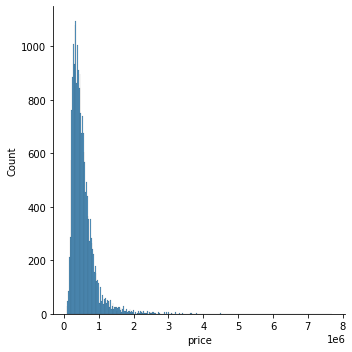

In [13]:
plt.figure(figsize=(10,6))
sns.displot(data["price"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


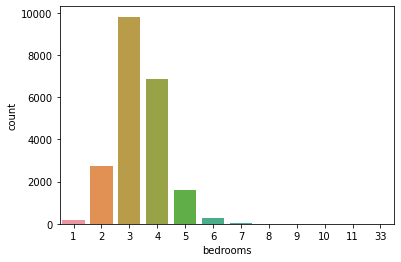

In [15]:
sns.countplot(data["bedrooms"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


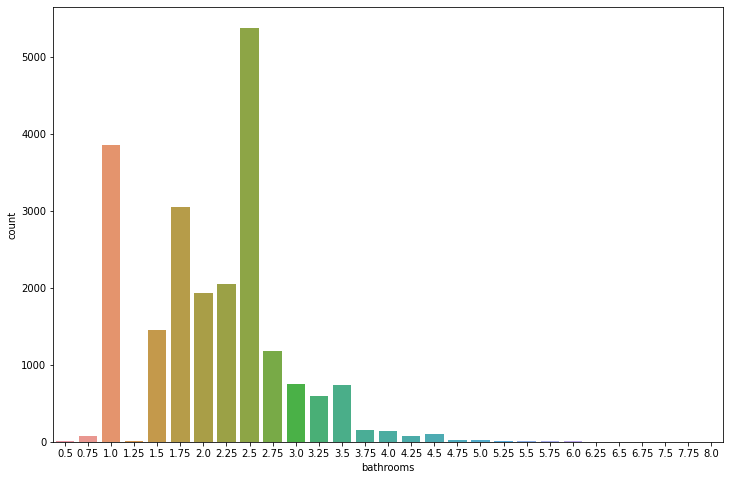

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(data["bathrooms"])

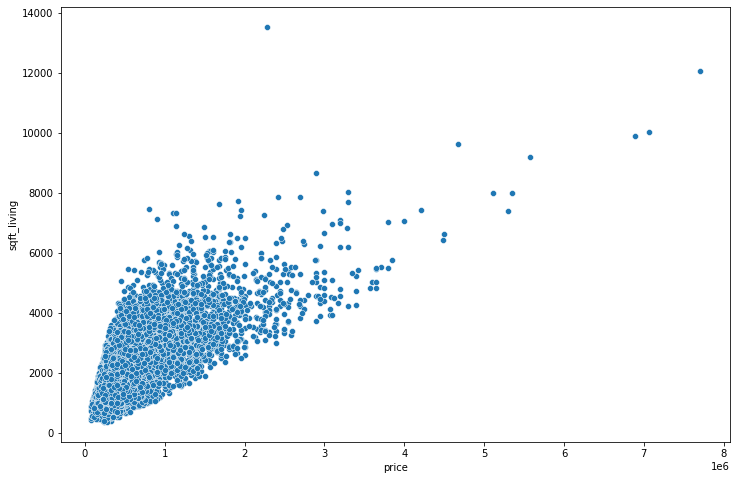

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="price",y="sqft_living", data=data) #precio aumenta conforme el espacio de construcción aumenta, pero hay una gran concentración en precio de 0,1,2 y 200 y 4000.

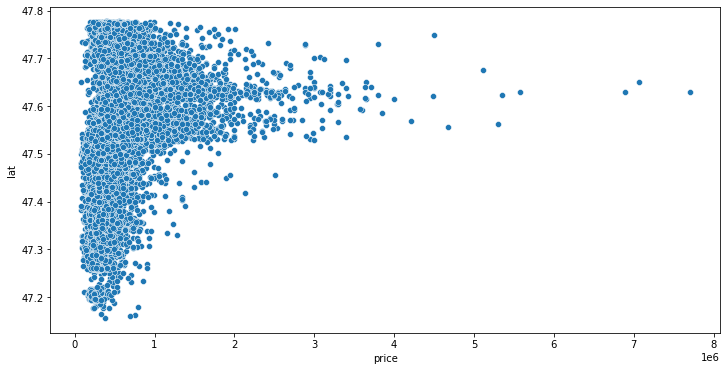

In [21]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="price",y="lat", data=data)

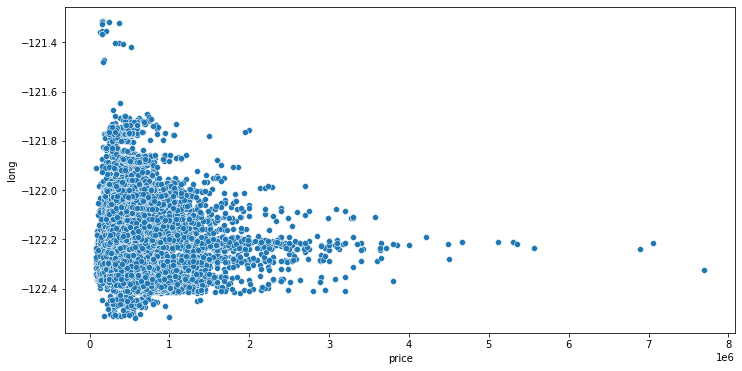

In [22]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="price",y="long", data=data) # no es tan fuerte porque para diferentes cordenadas, se tiene el mismo rango de precios.

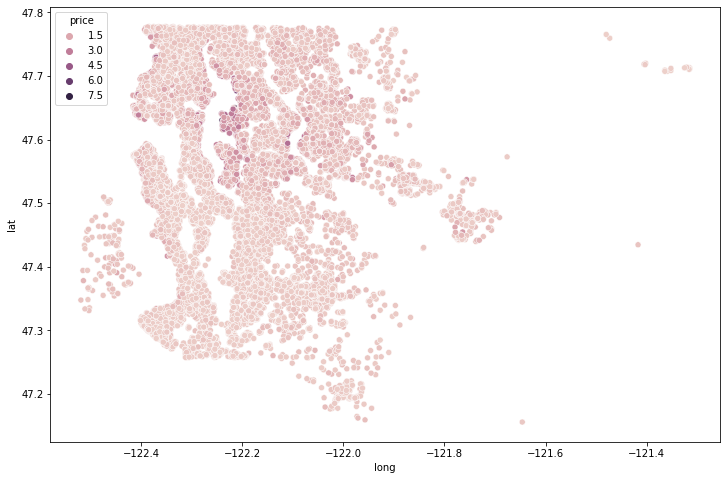

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="long",y="lat", hue="price", data=data) # en lugar de descartar longitud los combinamos, nos da un mapa y con color de precio

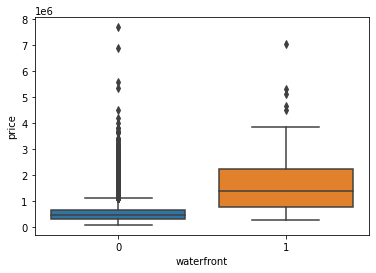

In [25]:
sns.boxplot(x="waterfront", y= "price", data=data) #las casas que tienenuna vista al lago tienen un precio mayor

In [26]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [27]:
data = data.drop('id', axis=1)

In [28]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [29]:
data["date"]= pd.to_datetime(data["date"])

In [31]:
data["date"]

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [32]:
data["year"] =  data["date"].apply(lambda date: date.year)

In [33]:
data["month"] =  data["date"].apply(lambda date: date.month)

In [35]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [36]:
data = data.drop("date",axis=1)
data = data.drop("zipcode", axis = 1) #axis = 1 es columna y 0 fila

In [37]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [38]:
data.shape

(21597, 20)

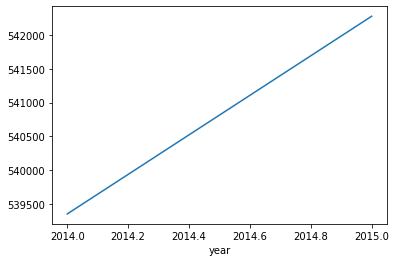

In [40]:
data.groupby("year").mean()["price"].plot() # conforme pasa el tiempo, el precio aumenta.

In [42]:
## y= mx + b
## Price = X(todas las demás (longitud....))
y = data["price"]
x = data.drop("price", axis=1)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 101) # 70% entrenamiento y 30% para prueba

In [46]:

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0000,322000.0000,450000.0000,645000.000,7.700000e+06
bedrooms,21597.0,3.373200,0.926299,1.0000,3.0000,3.0000,4.000,3.300000e+01
bathrooms,21597.0,2.115826,0.768984,0.5000,1.7500,2.2500,2.500,8.000000e+00
sqft_living,21597.0,2080.321850,918.106125,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,21597.0,15099.408760,41412.636876,520.0000,5040.0000,7618.0000,10685.000,1.651359e+06
floors,21597.0,1.494096,0.539683,1.0000,1.0000,1.5000,2.000,3.500000e+00
waterfront,21597.0,0.007547,0.086549,0.0000,0.0000,0.0000,0.000,1.000000e+00
view,21597.0,0.234292,0.766390,0.0000,0.0000,0.0000,0.000,4.000000e+00
condition,21597.0,3.409825,0.650546,1.0000,3.0000,3.0000,4.000,5.000000e+00
grade,21597.0,7.657915,1.173200,3.0000,7.0000,7.0000,8.000,1.300000e+01


In [49]:
#ayudarle a converger más rápido vamos a nromalizar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [50]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [51]:
# una neurona por cada columna, es decir, 19 neuronas
x_train.shape

(15117, 19)

In [52]:
#Neuronas en capa de salida, como queremos precedir precios, sería de una neurona
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [53]:
model = Sequential() #5 capas de modelo, las primeras capas 19, la de salida 1 neurona, y la funcion de activación relu, optimizador adam y función de pérdida mse

In [55]:
model.add(Dense(19, activation="relu"))
model.add(Dense(19, activation="relu"))
model.add(Dense(19, activation="relu"))
model.add(Dense(19, activation="relu"))
model.add(Dense(1)) # capa de salida
model.compile(optimizer="adam" ,loss="mse")

In [56]:
#entrenar el modelo
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size= 128, epochs=400) #epochs las veces que le damos vuelta a al red, las corridas, 

Epoch 1/400
119/119 [==============================] - 1s 5ms/step - loss: 435014782429.8666 - val_loss: 418837397504.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 424812909090.1334 - val_loss: 411548712960.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 410241480294.4000 - val_loss: 353184186368.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 328679840153.6000 - val_loss: 193429995520.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 170309396206.9333 - val_loss: 98046435328.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 100037351492.2667 - val_loss: 94101086208.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 96416788377.6000 - val_loss: 92419031040.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 94027252292.2667 - val_loss: 90791936000.0000
Epoch 9/400
119/119 [=

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [59]:
perdidas =pd.DataFrame(model.history.history)

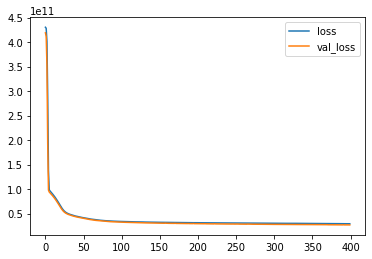

In [60]:
perdidas.plot() #a los 100 epochs se estabilizó, la red bastaba con 100, no necesariamnete 400, para no darnos cuenta de esto, hay un parámetro de cuando alzance una precisionde 80% se detenga...

In [61]:
predicciones = model.predict(x_test)

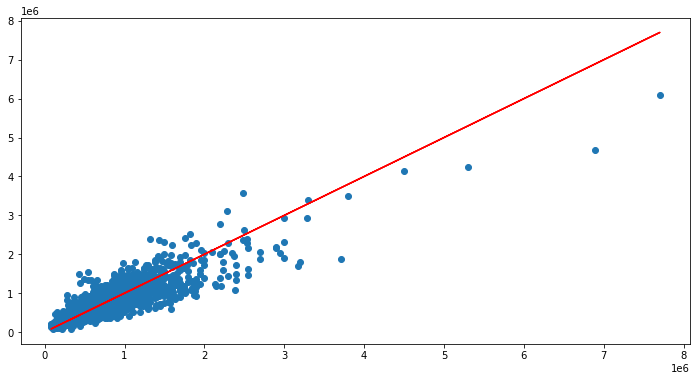

In [64]:
plt.figure(figsize= (12,6))
plt.scatter(y_test, predicciones)
plt.plot(y_test,y_test, color="r") ##notese que para valores de 2,000000 las predicciones son precisas, después no tanto

In [65]:
nueva_casa = data.drop('price', axis=1).iloc[0]

In [66]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [67]:
nueva_casa = scaler.transform(nueva_casa.values.reshape(-1,19))
model.predict(nueva_casa)

array([[276409.06]], dtype=float32)